QAWebex26 31/07/2024 10:48 • ## California Housing dataset characteristics:
Number of Instances: 20640
Number of Attributes: 8 numeric, predictive attributes and the target


<p>Attribute Information:</p>

- MedInc - median income in block group
- HouseAge - median house age in block group
- AveRooms - average number of rooms per household
- AveBedrms - average number of bedrooms per household
- Population - block group population
- AveOccup - average number of household members
- Latitude - block group latitude
- Longitude - block group longitude

## Exercise 1 – Setup

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/housing_data.csv")
df_STD = pd.read_csv("data/housing_data_cleaned_STD.csv")

## Exercise 2 – EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20526 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
df_STD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19680 entries, 0 to 19679
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      19680 non-null  float64
 1   HouseAge    19680 non-null  float64
 2   AveRooms    19680 non-null  float64
 3   AveBedrms   19680 non-null  float64
 4   Population  19680 non-null  float64
 5   AveOccup    19680 non-null  float64
 6   Latitude    19680 non-null  float64
 7   Longitude   19680 non-null  float64
 8   Target      19680 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Target'}>]], dtype=object)

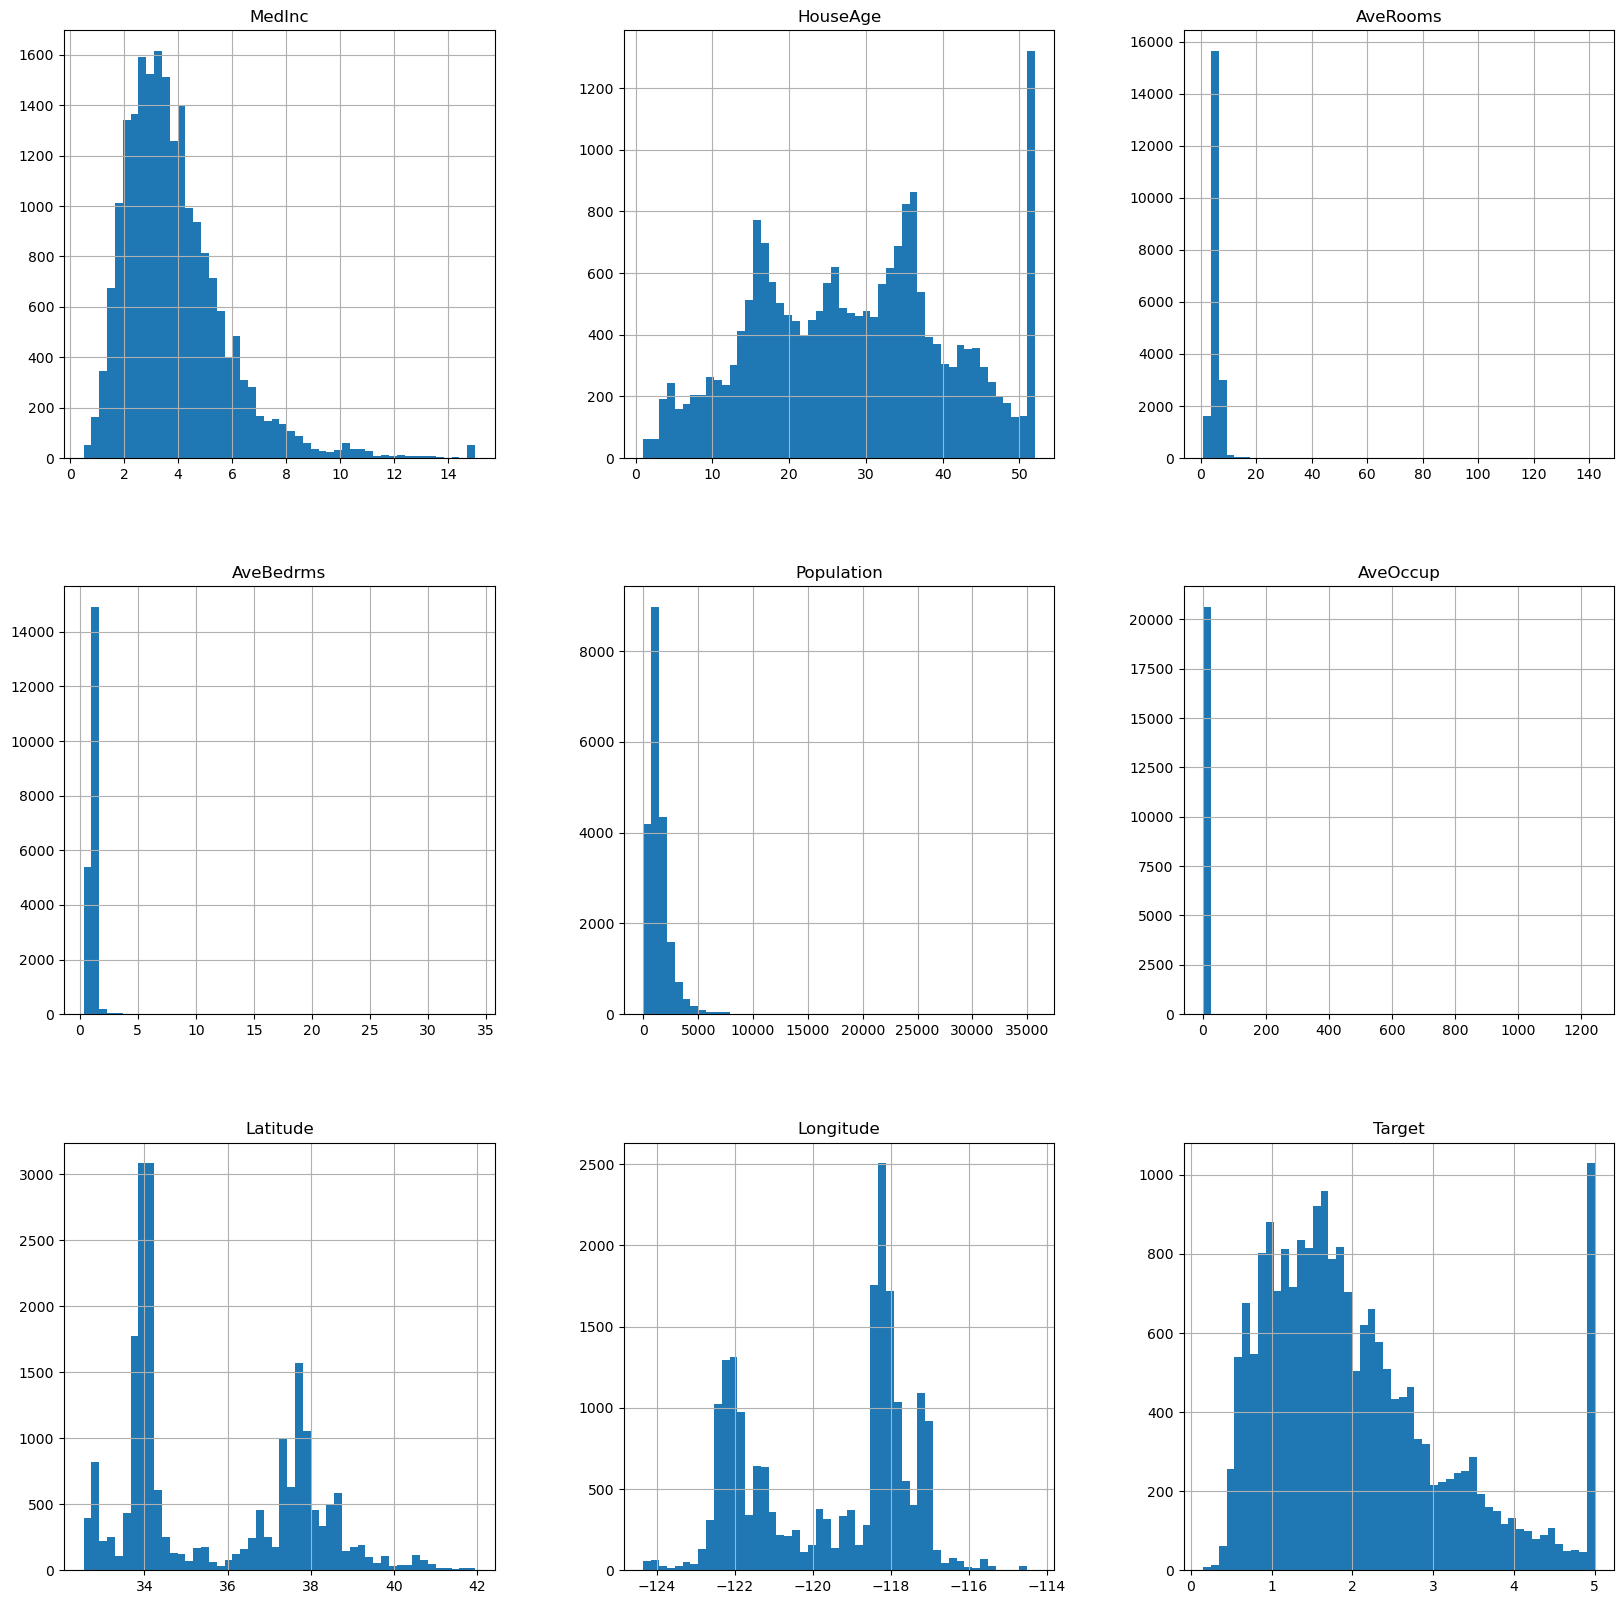

In [6]:
# viewing the distribution
df.hist(bins = 50, figsize=(20,20))

## Exercise 3 – Assumptions

array([[<Axes: xlabel='MedInc', ylabel='MedInc'>,
        <Axes: xlabel='HouseAge', ylabel='MedInc'>,
        <Axes: xlabel='AveRooms', ylabel='MedInc'>,
        <Axes: xlabel='AveBedrms', ylabel='MedInc'>,
        <Axes: xlabel='Population', ylabel='MedInc'>,
        <Axes: xlabel='AveOccup', ylabel='MedInc'>,
        <Axes: xlabel='Latitude', ylabel='MedInc'>,
        <Axes: xlabel='Longitude', ylabel='MedInc'>,
        <Axes: xlabel='Target', ylabel='MedInc'>],
       [<Axes: xlabel='MedInc', ylabel='HouseAge'>,
        <Axes: xlabel='HouseAge', ylabel='HouseAge'>,
        <Axes: xlabel='AveRooms', ylabel='HouseAge'>,
        <Axes: xlabel='AveBedrms', ylabel='HouseAge'>,
        <Axes: xlabel='Population', ylabel='HouseAge'>,
        <Axes: xlabel='AveOccup', ylabel='HouseAge'>,
        <Axes: xlabel='Latitude', ylabel='HouseAge'>,
        <Axes: xlabel='Longitude', ylabel='HouseAge'>,
        <Axes: xlabel='Target', ylabel='HouseAge'>],
       [<Axes: xlabel='MedInc', ylabel='AveR

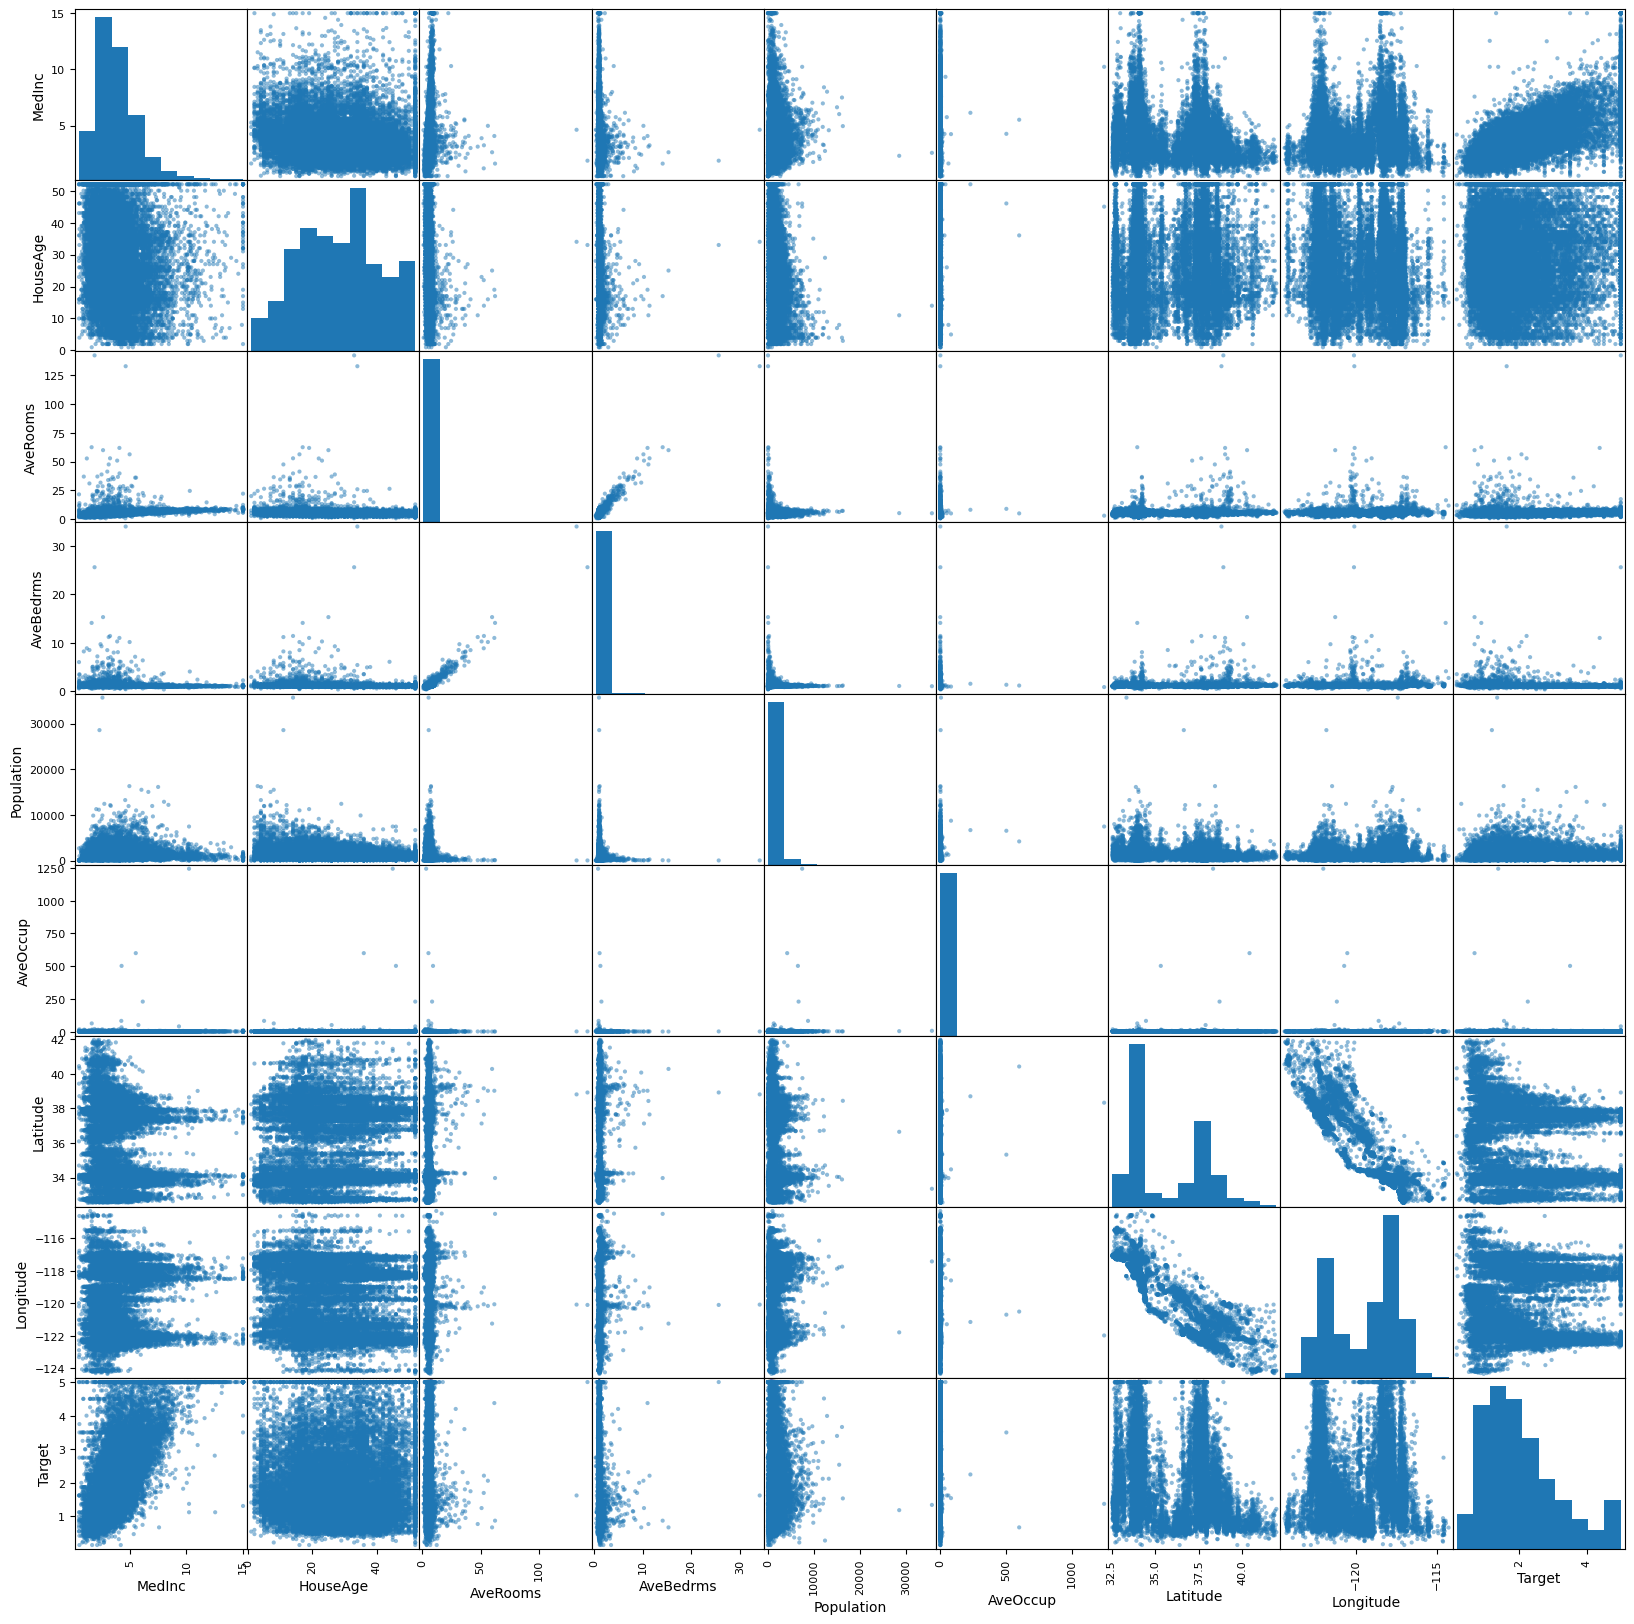

In [11]:
# plotting scatter of all columns against each other
pd.plotting.scatter_matrix(df,figsize = (20,20))

<Axes: >

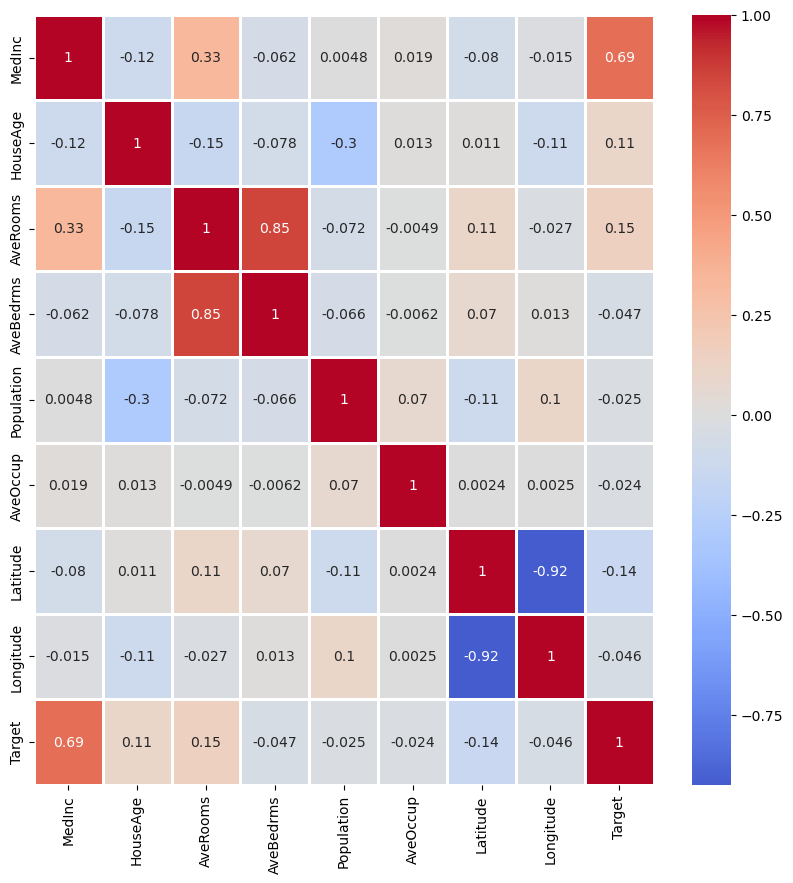

In [13]:
# Creating an axis on which to draw the heatmap
fig, ax = plt.subplots(figsize = (10, 10))

# Note: there is an exercise sheet on Matplot lib which you may find 
# useful in understanding about figures and axes
sns.heatmap(df.corr(method="pearson"), annot=True, center=0.0, linewidths=0.8, ax=ax, cmap="coolwarm")


## Exercise 4 – Feature engineering

In [14]:
df["BedroomRatio"] = df["AveBedrms"]/df["AveRooms"]

In [15]:
df["BedroomRatio"]

0        0.146591
1        0.155797
2        0.129516
3        0.184458
4        0.172096
           ...   
20635    0.224625
20636    0.215208
20637    0.215173
20638    0.219892
20639    0.221185
Name: BedroomRatio, Length: 20640, dtype: float64

<Axes: xlabel='AveBedrms', ylabel='AveRooms'>

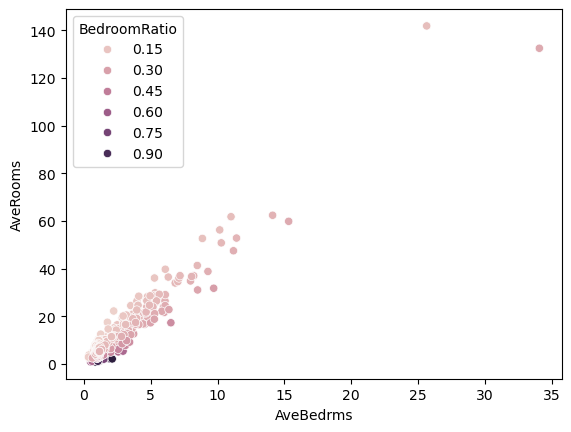

In [20]:
#X = np.linspace(0, 2*np.pi, 100)
#Y = np.cos(X)
sns.scatterplot(data=df, x="AveBedrms", y="AveRooms", hue="BedroomRatio")

In [34]:
from sklearn.model_selection import train_test_split

X = df[["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup","Latitude", "Longitude", "BedroomRatio"]]
y = df["Target"]

#splitting the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [35]:
# importing the package
from sklearn.preprocessing import StandardScaler

#Calling the method twice, once for the features and once for the target
scaler = StandardScaler()
scaler_target = StandardScaler()



In [25]:
# Sci-Kit learn returns an array by default we will be putting the data into another dataframe
# Extracting the column names for the purpose
cols = list(X_train.columns)
cols

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'BedroomRatio']

In [36]:
# Fitting the scaler on the training features and applying it to both the training and test data
# Note how the Scaler is only fit to the training set, but then applied to both
X_train[cols] = scaler.fit_transform(X_train)
X_test[cols] = scaler.transform(X_test)


C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

In [37]:
# Fitting the scaler on the training target and applying it to both the training and test data
y_train = scaler_target.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_target.transform(y_test.values.reshape(-1, 1))

In [63]:
X_train.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,BedroomRatio
count,1.444800e+04,1.444800e+04,1.436800e+04,1.444800e+04,1.444800e+04,1.444800e+04,1.444800e+04,1.444800e+04,1.436800e+04
mean,-1.003258e-16,-5.286776e-17,1.681407e-17,3.501567e-16,6.786745e-17,1.278662e-17,-1.464068e-15,3.856150e-15,3.827673e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-1.772846e+00,-2.186232e+00,-1.850600e+00,-1.708893e+00,-1.249733e+00,-1.961439e-01,-1.451850e+00,-2.379545e+00,-1.935771e+00
25%,-6.875459e-01,-8.384372e-01,-4.026481e-01,-2.039186e-01,-5.586172e-01,-5.567326e-02,-8.009995e-01,-1.106366e+00,-6.477049e-01
50%,-1.773331e-01,3.366524e-02,-8.418964e-02,-1.084759e-01,-2.279693e-01,-2.441482e-02,-6.464812e-01,5.362840e-01,-1.721796e-01
75%,4.626017e-01,6.679216e-01,2.526396e-01,5.127834e-03,2.623017e-01,1.292294e-02,9.689383e-01,7.859269e-01,4.546069e-01
max,5.839437e+00,1.857152e+00,5.550671e+01,5.483640e+01,3.004254e+01,1.002338e+02,2.949583e+00,2.633284e+00,1.347301e+01


In [31]:
y_train.values.reshape(-1, 1)

array([[-1.37564159],
       [-1.39205695],
       [ 2.53208726],
       ...,
       [ 0.09914913],
       [-0.75617765],
       [ 0.02484801]])

In [39]:
y_train

array([[-0.11338662],
       [-0.32160253],
       [ 0.45683123],
       ...,
       [ 0.13111588],
       [ 0.66159128],
       [ 1.02013735]])

## Exercise 6 – Building your first model

In [87]:
# Setting the features that we will use
cols = ["MedInc"]
# cols = ["MedInc", "AveBedrms"]

In [88]:
#import the necessary package
from sklearn.linear_model import LinearRegression

# call the method
regressor = LinearRegression(fit_intercept = False)

# Fit the model
regressor.fit(X_train[cols], y_train)

# Carry out predictions on our test set
y_pred = regressor.predict(X_test[cols])

C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

## Exercise 7 - Plotting the Model

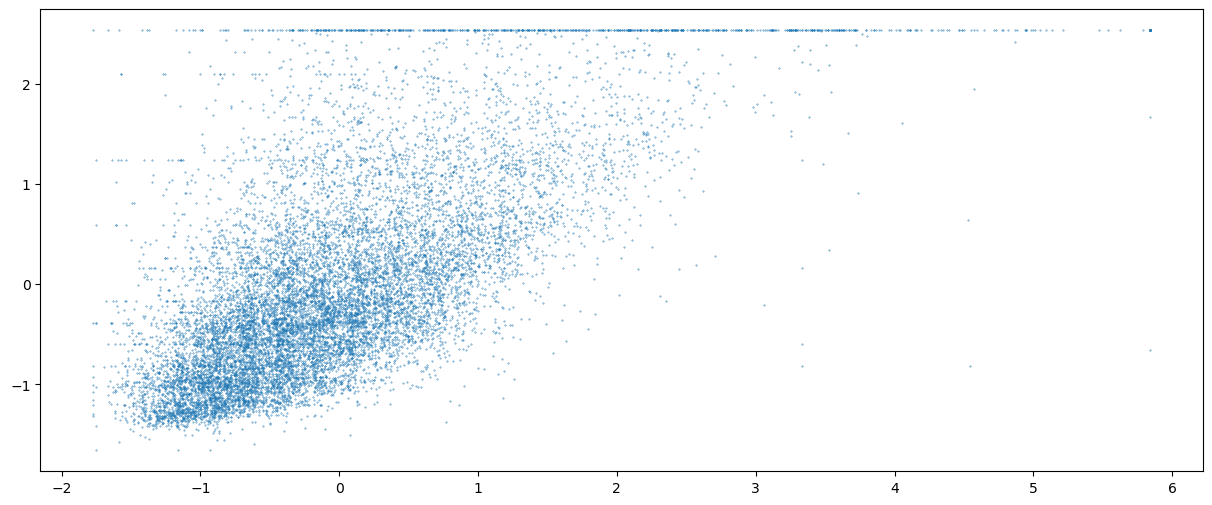

In [73]:
plt.figure(figsize=(15,6))
# plotting MedInc against target
plt.scatter(X_train[cols], y_train, s=0.1)

In [45]:
# Selecting x values to input into the model
# Started at the min value of MedInc that we have,
# the upper limit was found by experimenting so as not to exceed the y value
# in this case the linear model is very poor at predicting anything
# over a standardised x value of over 3
import numpy as np
x = np.linspace(X_train[cols].min(), 3.6, 100)

In [46]:
# Using the gradient and intercept from the model to plot.
# The intercept is zero but it is added for completeness
# y = m              *x + c
y = (regressor.coef_)*x + (regressor.intercept_)

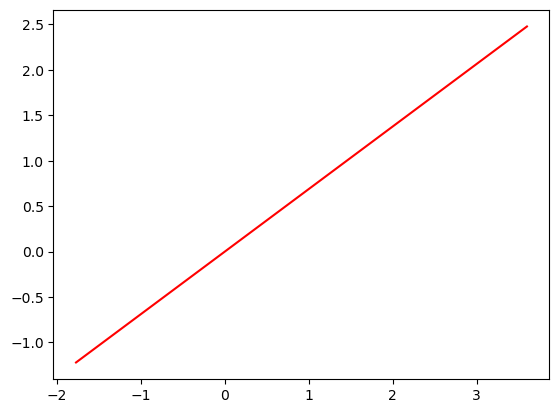

In [47]:
# Plotting the linear model
plt.plot(x, y, "-r")

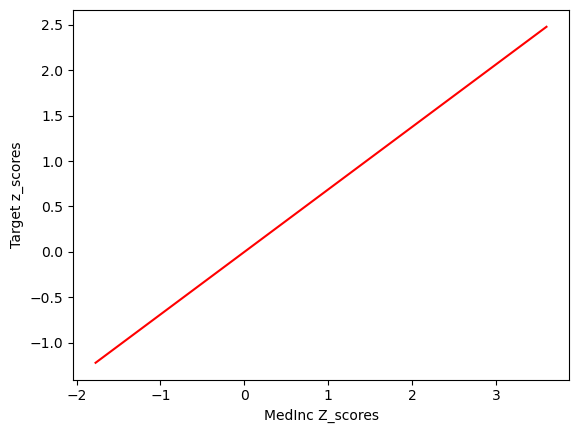

In [49]:
# Plotting the linear model
plt.plot(x, y, "-r")
# Adding labels to each axis
plt.xlabel("MedInc Z_scores")
plt.ylabel("Target z_scores")

plt.show()

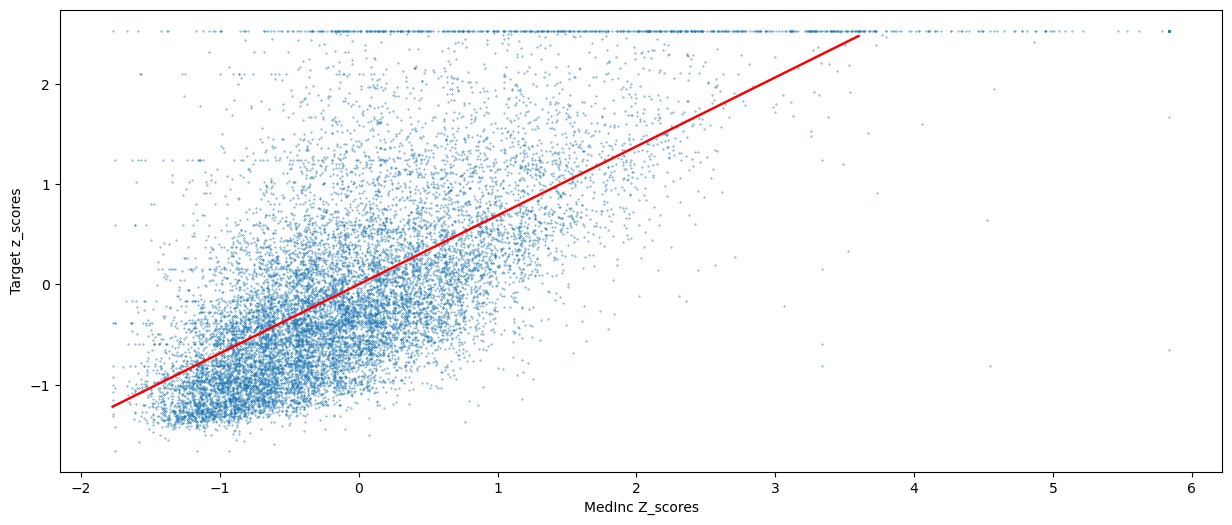

In [91]:
# Putting it all together
plt.figure(figsize=(15,6))
# plotting MedInc against target
plt.scatter(X_train[cols], y_train, s=0.1)
import numpy as np
x = np.linspace(X_train[cols].min(), 3.6, 100)
y = (regressor.coef_)*x+(regressor.intercept_)
# Plotting the linear model
plt.plot(x, y, "-r")
# Plotting the linear model
plt.plot(x, y, "-r")
# Adding labels to each axis
plt.xlabel("MedInc Z_scores")
plt.ylabel("Target z_scores")

plt.show()

## Exercise 8 – Evaluating your model

In [76]:
# First we need to reverse the transformation so we have meaningful results
# calling inverse_transform on our scaler
y_true = scaler_target.inverse_transform(y_test) # <- observed y values
y_pred_inverse = scaler_target.inverse_transform(y_pred) # <- predicted y
print(y_true)
print(y_pred_inverse)

[[0.477  ]
 [0.458  ]
 [5.00001]
 ...
 [2.184  ]
 [1.194  ]
 [2.098  ]]
[[1.15101618]
 [1.50652228]
 [1.90330405]
 ...
 [1.91664442]
 [1.97435509]
 [1.72427551]]


In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# calculating the errors
mae = mean_absolute_error(y_true, y_pred_inverse)
mse = mean_squared_error(y_true, y_pred_inverse)
rmse = np.sqrt(mse)
# calculating the R^2
r2 = r2_score(y_true, y_pred_inverse)
print(r2)

0.47293192589970245


In [55]:
# Viewing these results
print(f"MAE =  {mae.round(3)}")
print(f"MSE =  {mse}")
print(f"RMSE =  {rmse}")
print(f"R^2 =  {r2}")

MAE =  0.623
MSE =  0.6917979868048499
RMSE =  0.8317439430526982
R^2 =  0.47293192589970245


## Increasing the variables

In [93]:
# QAWebex26 31/07/2024 15:23 • cols =['MedInc','BedroomRatio']
cols =['MedInc']
# cols =['MedInc','BedroomRatio']
# call the method
regressor = LinearRegression( fit_intercept = False)

# Fit the model
regressor.fit(X_train[cols], y_train)

# Carry out predictions on our test set
y_pred = regressor.predict(X_test[cols])

# first we need to reverse the transformation so we have meanginful results
y_true = scaler_target.inverse_transform(y_test)
y_pred = scaler_target.inverse_transform(y_pred)

# Calculating the errors
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

# Calculting the R^2
r2 = r2_score(y_true, y_pred)

# Viewing these results
print('MAE = ', mae.round(4))
print('MSE = ', mse.round(4))
print('RMSE = ', rmse.round(4))
print('R^2 = ', r2.round(4))

MAE =  0.6232
MSE =  0.6918
RMSE =  0.8317
R^2 =  0.4729


C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

## Residual Analysis

In [ ]:
residuals = y_true - y_pred
residuals.mean() # should be around zero

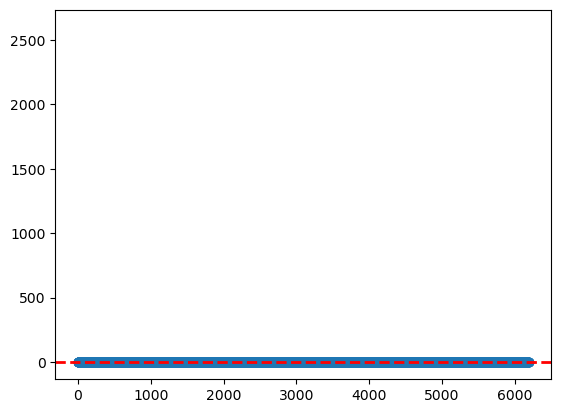

In [94]:
# QAWebex26 31/07/2024 15:45 • Residual Analysis:
residuals = y_true - y_pred
residuals

residuals.mean()

range_residue = len(residuals)
plt.scatter(range(0, range_residue), residuals )
plt.axhline(y=residuals.mean(), color='r', linestyle='--', linewidth=2)

import matplotlib.pyplot as plt
plt.hist(residuals)
plt.show()